In [2]:
import numpy as np
import matplotlib.pyplot as plt


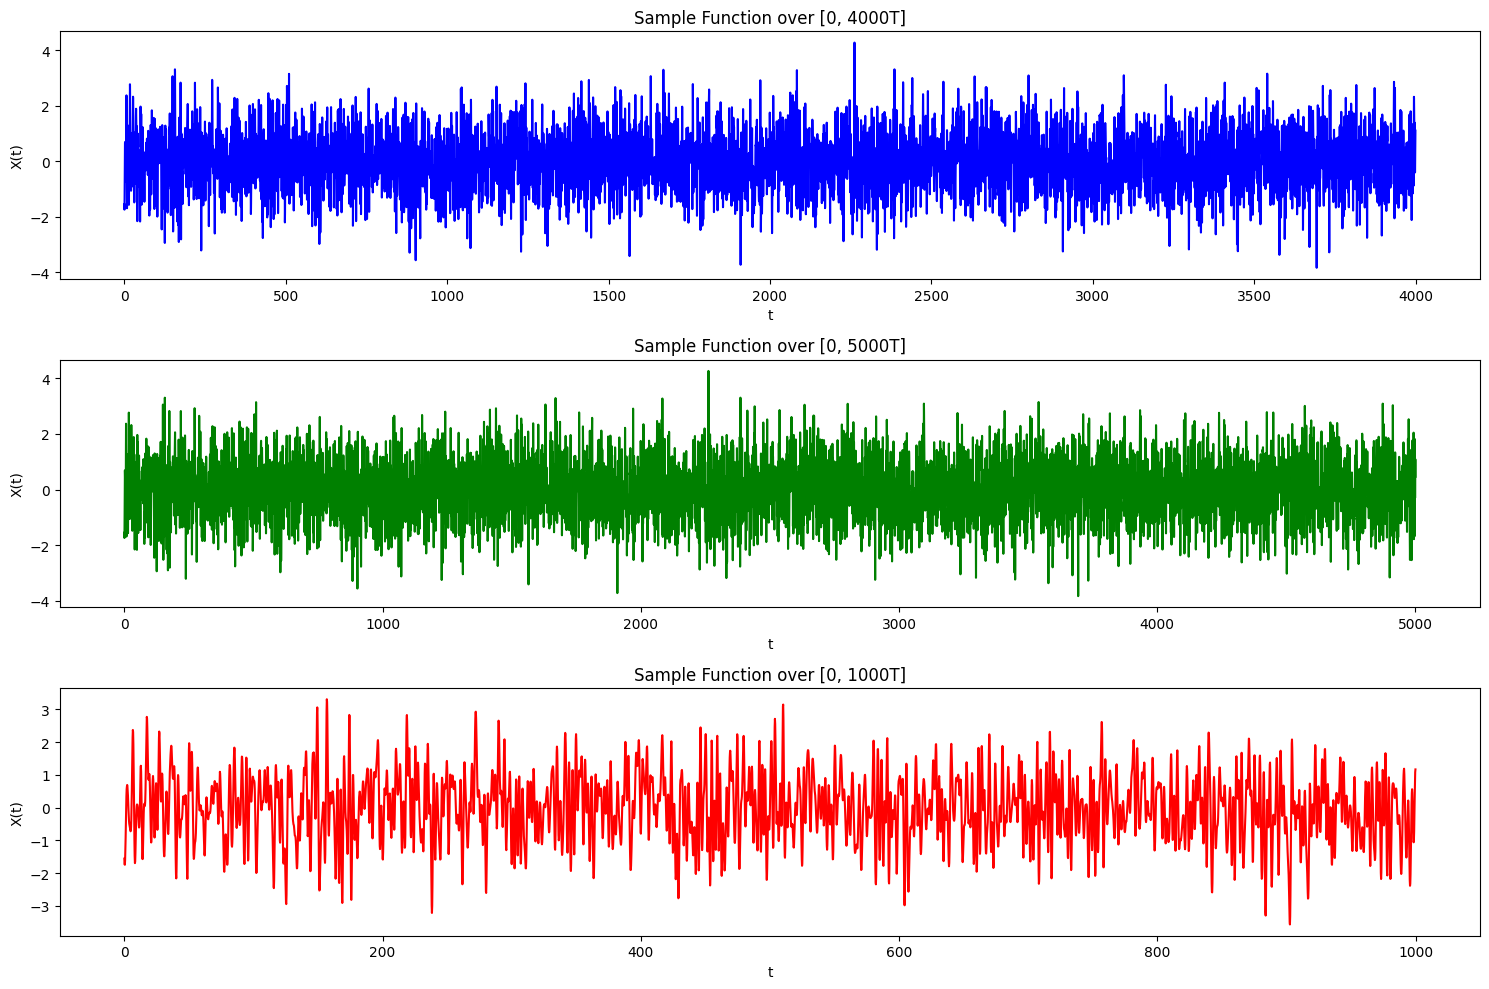

In [8]:

# Parameters
T = 1                 # Time spacing of samples
n_samples = 5000      # Number of samples (largest range needed for [0, 5000T])
time_total = np.arange(0, n_samples * T, T)  # Full time range up to [0, 5000T]

# Generate i.i.d. Gaussian random variables X_k with mean 0 and variance 1
X_k = np.random.normal(0, 1, n_samples)

# Define the sinc interpolation function
def sinc_interp(t, X_k, T):
    k_indices = int(np.floor(t / T))
    # Truncate to 5 terms on each side of k
    k_range = range(max(0, k_indices - 5), min(len(X_k), k_indices + 6))
    return sum(X_k[k] * np.sinc((t - k * T) / T) for k in k_range)

# Define time steps at a rate of 5/T
delta_t = 0.2 * T
t_samples_4000 = np.arange(0, 4000 * T, delta_t)
t_samples_5000 = np.arange(0, 5000 * T, delta_t)
t_samples_1000 = np.arange(0, 1000 * T, delta_t)

# Compute X(t) for each range using sinc interpolation
X_t_4000 = [sinc_interp(t, X_k, T) for t in t_samples_4000]
X_t_5000 = [sinc_interp(t, X_k, T) for t in t_samples_5000]
X_t_1000 = [sinc_interp(t, X_k, T) for t in t_samples_1000]

# Plot the results for each range
fig, axs = plt.subplots(3, 1, figsize=(15, 10))

# Plot for [0, 4000T]
axs[0].plot(t_samples_4000, X_t_4000, color="blue")
axs[0].set_title("Sample Function over [0, 4000T]")
axs[0].set_xlabel("t")
axs[0].set_ylabel("X(t)")

# Plot for [0, 5000T]
axs[1].plot(t_samples_5000, X_t_5000, color="green")
axs[1].set_title("Sample Function over [0, 5000T]")
axs[1].set_xlabel("t")
axs[1].set_ylabel("X(t)")

# Plot for [0, 1000T]
axs[2].plot(t_samples_1000, X_t_1000, color="red")
axs[2].set_title("Sample Function over [0, 1000T]")
axs[2].set_xlabel("t")
axs[2].set_ylabel("X(t)")

# Display the plots
plt.tight_layout()
plt.show()


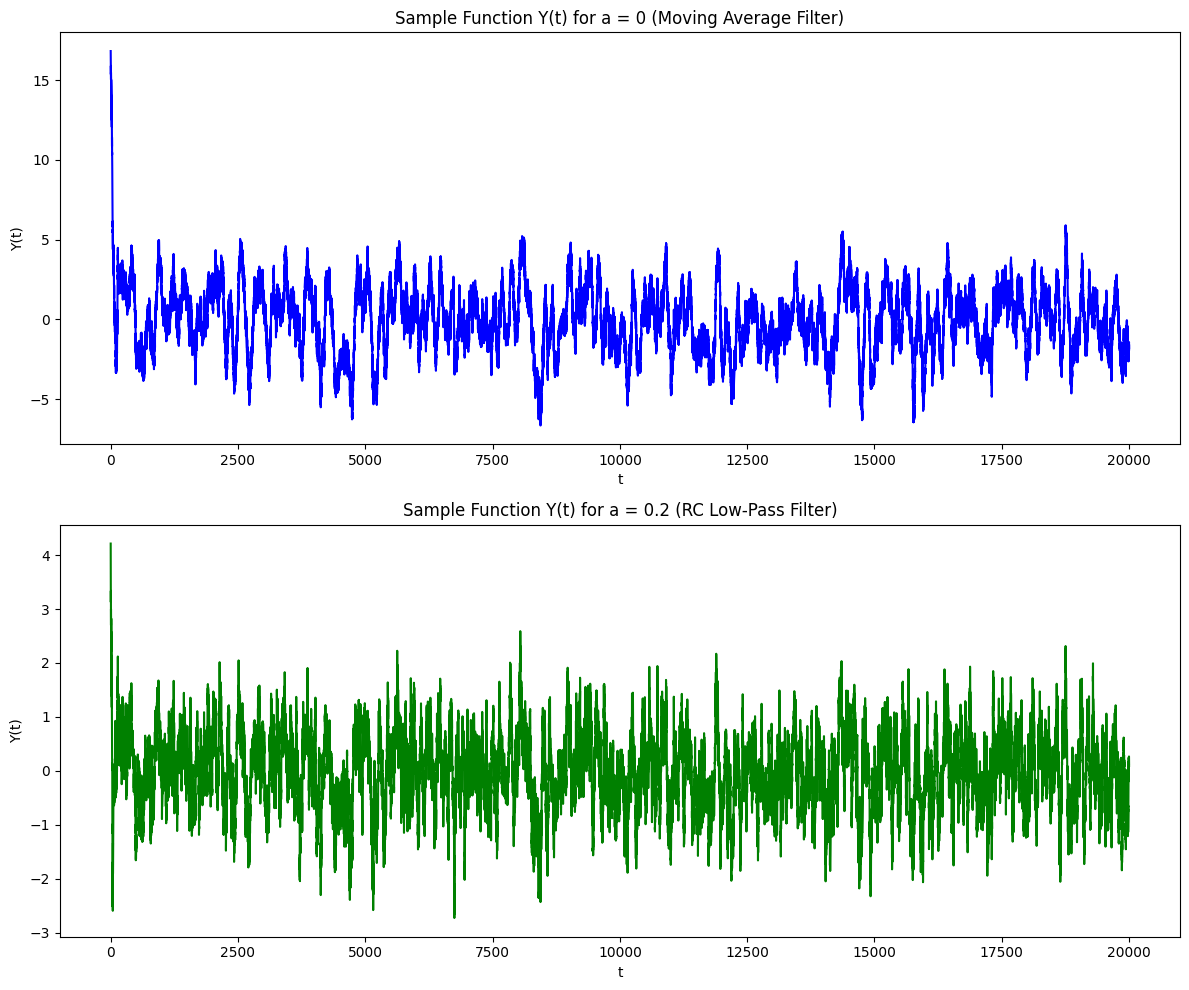

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 1                # Time spacing of samples
n_samples = 20000     # Number of samples needed
delta_t = 0.2 * T    # Time step for sampling rate 5/T
time_total = np.arange(0, n_samples * T, T)  # Full time range
t_samples = np.arange(0, n_samples * T, delta_t)  # Time samples at rate 5/T

# Generate i.i.d. Gaussian random variables X_k with mean 0 and variance 1
X_k = np.random.normal(0, 1, n_samples)

# Define the filter function for different values of 'a'
def filter_function(t, a):
    if 0 <= t < 20:
        return np.exp(-a * t)
    else:
        return 0

# Function to calculate Y(t) for given 'a'
def compute_Y(t, X_k, T, a, delta_t):
    k_index = int(np.floor(t / T))  # Find the index of the closest sample
    Y_t = 0
    for k in range(0, 101):  # Sum for k=0 to 100
        time_shift = t - k_index * T + k * delta_t
        if time_shift >= 0:
            Y_t += X_k[max(0, k_index - k)] * filter_function(time_shift, a) * delta_t
    return Y_t

# Compute Y(t) for each value of 'a'
Y_t_a0 = [compute_Y(t, X_k, T, 0, delta_t) for t in t_samples]
Y_t_a02 = [compute_Y(t, X_k, T, 0.2, delta_t) for t in t_samples]

# Plot the results for a = 0 and a = 0.2
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# Plot for a = 0 (moving average filter)
axs[0].plot(t_samples, Y_t_a0, color="blue")
axs[0].set_title("Sample Function Y(t) for a = 0 (Moving Average Filter)")
axs[0].set_xlabel("t")
axs[0].set_ylabel("Y(t)")

# Plot for a = 0.2 (RC low-pass filter)
axs[1].plot(t_samples, Y_t_a02, color="green")
axs[1].set_title("Sample Function Y(t) for a = 0.2 (RC Low-Pass Filter)")
axs[1].set_xlabel("t")
axs[1].set_ylabel("Y(t)")

# Display the plots
plt.tight_layout()
plt.show()


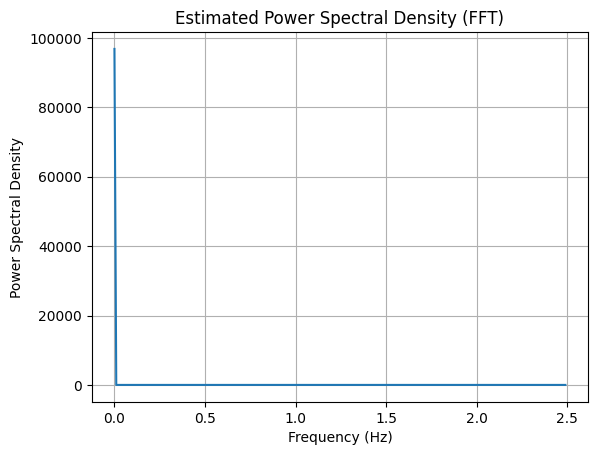

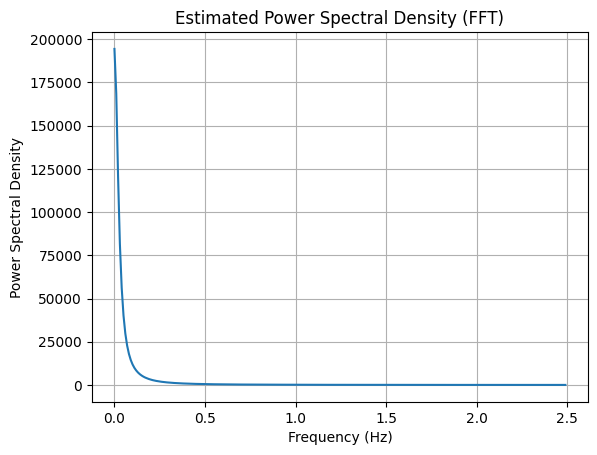

In [6]:

# Constants
T = 1  # Time spacing (T=1 for simplicity)
a_values = [0, 0.2]  # Different values for 'a'
sample_rate = 5 / T  # Sampling rate 5/T
time_end = 100 * T  # Time range for the signal
num_samples = int(time_end * sample_rate)  # Number of samples

# Generate the Gaussian random variables X_k
X_k = np.random.normal(0, 1, 100)  # 100 samples for X_k

# Time array for plotting
time = np.linspace(0, time_end, num_samples)

# Function to compute the filter response H(f) for different values of 'a'
def compute_H(f, a=0):
    if a == 0:
        # Moving average filter H(f) = (1 - exp(-j2πfT)) / (j2πf)
        return (1 - np.exp(-1j * 2 * np.pi * f * T)) / (1j * 2 * np.pi * f)
    else:
        # RC low-pass filter H(f) = 1 / (a + j2πf)
        return 1 / (a + 1j * 2 * np.pi * f)

# Function to generate Y(t) based on the given filter
def generate_Y(t, X_k, a=0, delta_t=0.2):
    Y_t = np.zeros_like(t)
    for k in range(len(X_k)):
        # Evaluate the sum for Y(t)
        for i, ti in enumerate(t):
            k_index = int(np.floor(ti / T))
            filter_term = np.exp(-a * (ti - (k_index + k) * delta_t))
            Y_t[i] += X_k[k] * filter_term
    return Y_t

# Generate and plot the PSD from FFT estimation
def plot_psd(Y_t, N):
    # Perform FFT to estimate the power spectral density
    Y_f = np.fft.fft(Y_t, N)
    S_Y_f = np.abs(Y_f)**2 / N  # Power spectral density
    freqs = np.fft.fftfreq(N, d=(1 / sample_rate))  # Frequency array
    
    plt.figure()
    plt.plot(freqs[:N//2], S_Y_f[:N//2])  # Plot positive frequencies
    plt.title("Estimated Power Spectral Density (FFT)")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Power Spectral Density")
    plt.grid(True)

# Plot for both cases: a = 0 (Moving average filter) and a = 0.2 (RC low-pass filter)
for a in a_values:
    Y_t = generate_Y(time, X_k, a=a)
    N = len(time)  # Length of FFT
    plot_psd(Y_t, N)

plt.show()


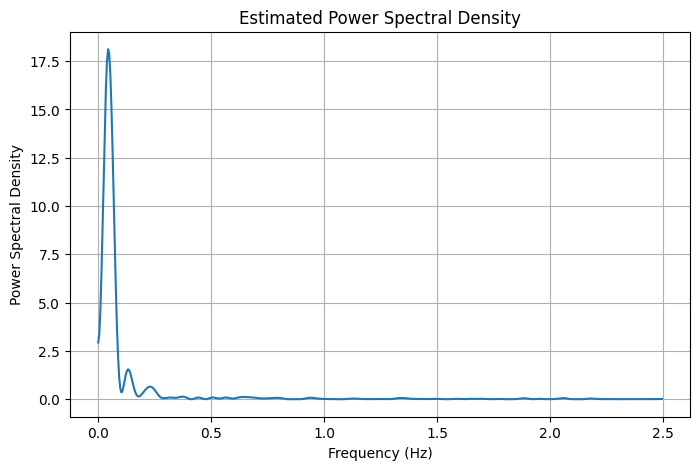

In [3]:
# Parameters
T = 1
Delta_t = 0.2 * T
a = 0.2  # Change to 0 for the moving average case
sigma = 1  # Variance of Gaussian random variables
num_samples = 100
time = np.arange(0, 20, Delta_t)

# Generate Gaussian i.i.d. samples
X_k = np.random.normal(0, sigma, num_samples)

# Generate Y(t) using the given filter expression
h = lambda t: np.exp(-a * t) * (t >= 0) * (t < 20)
Y = np.zeros_like(time)

for i, t in enumerate(time):
    for k in range(min(int(t // Delta_t), num_samples)):
        Y[i] += X_k[k] * h(t - k * Delta_t) * Delta_t
# Compute FFT
N = 1024  # FFT length
frequencies = np.fft.fftfreq(N, Delta_t)
Y_fft = np.fft.fft(Y, N)
PSD = (np.abs(Y_fft) ** 2) / len(Y)

# Plot PSD
plt.figure(figsize=(8, 5))
plt.plot(frequencies[:N // 2], PSD[:N // 2])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.title('Estimated Power Spectral Density')
plt.grid()
plt.show()


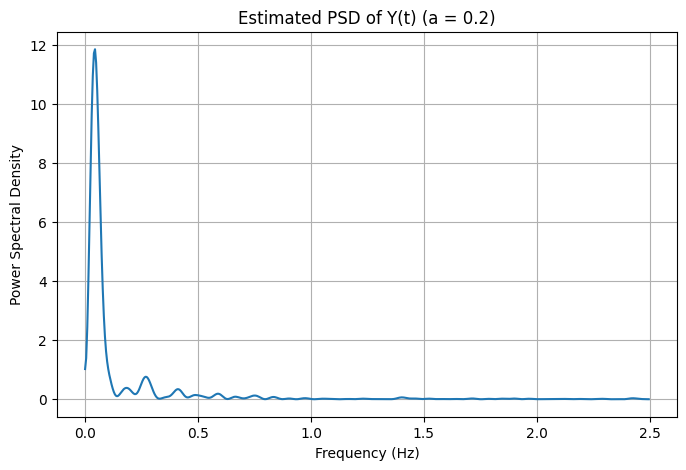

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 1               # Time spacing
Delta_t = 0.2 * T   # Sampling interval
a = 0.2             # Filter decay rate (change to 0 for moving average)
sigma = 1           # Variance of Gaussian random variables
num_samples = 100   # Number of samples in the sequence
N = 1024            # FFT length
time = np.arange(0, 20, Delta_t)  # Time vector for evaluation

# Generate Gaussian i.i.d. samples
X_k = np.random.normal(0, sigma, num_samples)

# Define filter impulse response h(t)
def h(t, a):
    return np.exp(-a * t) * (t >= 0) * (t < 20)

# Compute Y(t)
Y = np.zeros_like(time)
for i, t in enumerate(time):
    for k in range(min(int(t // Delta_t), num_samples)):
        Y[i] += X_k[k] * h(t - k * Delta_t, a) * Delta_t

# Perform FFT
frequencies = np.fft.fftfreq(N, Delta_t)
Y_fft = np.fft.fft(Y, N)
PSD = (np.abs(Y_fft) ** 2) / len(Y)

# Plot PSD
plt.figure(figsize=(8, 5))
plt.plot(frequencies[:N // 2], PSD[:N // 2])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.title(f'Estimated PSD of Y(t) (a = {a})')
plt.grid()
plt.show()


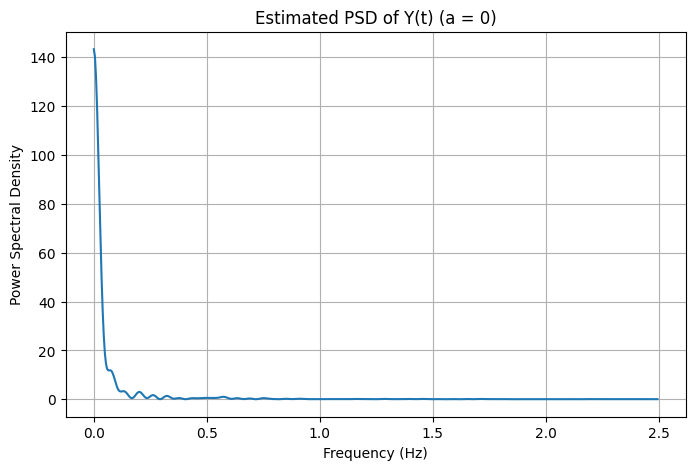

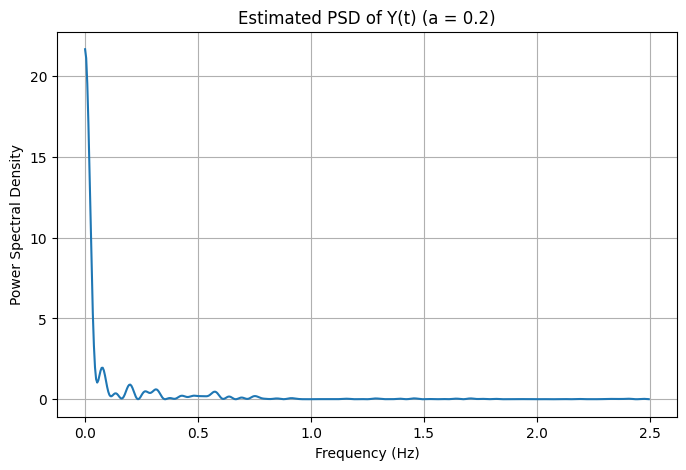

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 1               # Time spacing
Delta_t = 0.2 * T   # Sampling interval
sigma = 1           # Variance of Gaussian random variables
num_samples = 100   # Number of samples in the sequence
N = 1024            # FFT length
time = np.arange(0, 20, Delta_t)  # Time vector for evaluation

# Generate Gaussian i.i.d. samples
X_k = np.random.normal(0, sigma, num_samples)

# Define filter impulse response h(t)
def h(t, a):
    return np.exp(-a * t) * (t >= 0) * (t < 20)

# Compute and plot for both a = 0 and a = 0.2
for a in [0, 0.2]:
    # Compute Y(t)
    Y = np.zeros_like(time)
    for i, t in enumerate(time):
        for k in range(min(int(t // Delta_t), num_samples)):
            Y[i] += X_k[k] * h(t - k * Delta_t, a) * Delta_t

    # Perform FFT
    frequencies = np.fft.fftfreq(N, Delta_t)
    Y_fft = np.fft.fft(Y, N)
    PSD = (np.abs(Y_fft) ** 2) / len(Y)

    # Plot PSD
    plt.figure(figsize=(8, 5))
    plt.plot(frequencies[:N // 2], PSD[:N // 2])
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power Spectral Density')
    plt.title(f'Estimated PSD of Y(t) (a = {a})')
    plt.grid()
    plt.show()


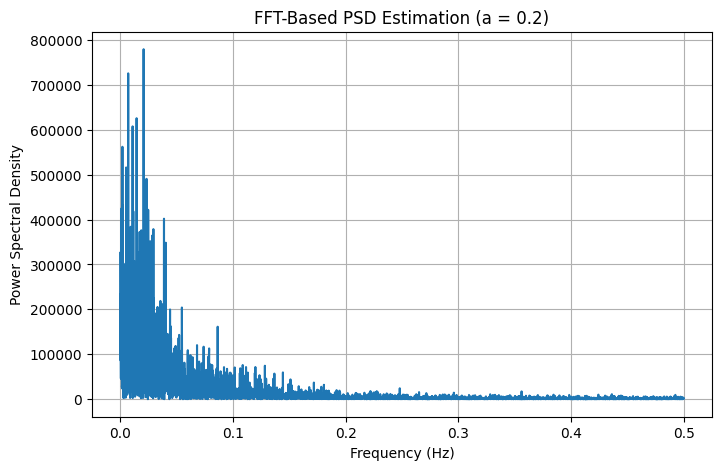

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 2**13            # Number of FFT points
Delta_t = 1          # Sampling interval
Delta_f = 1 / (N * Delta_t)  # Frequency resolution
frequencies = np.arange(N) * Delta_f  # Frequency array
a = 0.2              # Filter parameter (can set a = 0 for moving average)

# Generate Gaussian i.i.d. samples
np.random.seed(0)  # For reproducibility
X_k = np.random.normal(0, 1, N)

# Define filter impulse response h(t)
def h(t, a):
    return np.exp(-a * t) * (t >= 0) * (t < 20)

# Compute Y(t)
Y = np.zeros(N)
for i in range(N):
    for k in range(min(i, len(X_k))):
        Y[i] += X_k[k] * h(i - k, a) * Delta_t

# Perform FFT
Y_fft = np.fft.fft(Y)
PSD = np.abs(Y_fft) ** 2  # Power Spectral Density

# Plot
plt.figure(figsize=(8, 5))
plt.plot(frequencies[:N // 2], PSD[:N // 2])  # Plot only positive frequencies
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.title(f'FFT-Based PSD Estimation (a = {a})')
plt.grid()
plt.show()


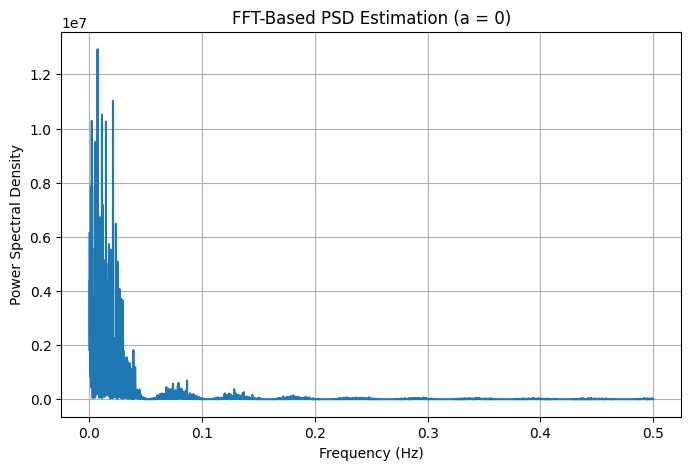

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 2**13            # Number of FFT points
Delta_t = 1          # Sampling interval
Delta_f = 1 / (N * Delta_t)  # Frequency resolution
frequencies = np.arange(N) * Delta_f  # Frequency array
a = 0              # Filter parameter (can set a = 0 for moving average)

# Generate Gaussian i.i.d. samples
np.random.seed(0)  # For reproducibility
X_k = np.random.normal(0, 1, N)

# Define filter impulse response h(t)
def h(t, a):
    return np.exp(-a * t) * (t >= 0) * (t < 20)

# Compute Y(t)
Y = np.zeros(N)
for i in range(N):
    for k in range(min(i, len(X_k))):
        Y[i] += X_k[k] * h(i - k, a) * Delta_t

# Perform FFT
Y_fft = np.fft.fft(Y)
PSD = np.abs(Y_fft) ** 2  # Power Spectral Density

# Plot
plt.figure(figsize=(8, 5))
plt.plot(frequencies[:N // 2], PSD[:N // 2])  # Plot only positive frequencies
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.title(f'FFT-Based PSD Estimation (a = {a})')
plt.grid()
plt.show()


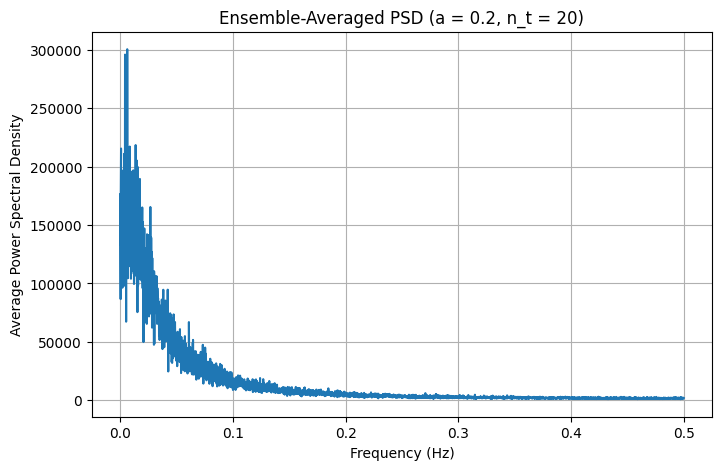

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 2**13            # Number of FFT points
Delta_t = 1          # Sampling interval
Delta_f = 1 / (N * Delta_t)  # Frequency resolution
frequencies = np.arange(N) * Delta_f  # Frequency array
n_t = 20             # Number of realizations
a = 0.2              # Filter parameter (can set a = 0 for moving average)

# Function to generate Gaussian i.i.d. samples and compute PSD
def compute_psd(N, a):
    # Generate Gaussian i.i.d. samples
    X_k = np.random.normal(0, 1, N)
    
    # Define filter impulse response h(t)
    def h(t, a):
        return np.exp(-a * t) * (t >= 0) * (t < 20)
    
    # Compute Y(t)
    Y = np.zeros(N)
    for i in range(N):
        for k in range(min(i, len(X_k))):
            Y[i] += X_k[k] * h(i - k, a) * Delta_t
    
    # Perform FFT
    Y_fft = np.fft.fft(Y)
    PSD = np.abs(Y_fft) ** 2  # Power Spectral Density
    return PSD

# Initialize an array to store the average PSD
avg_psd = np.zeros(N)

# Compute PSD for n_t realizations and average
for _ in range(n_t):
    avg_psd += compute_psd(N, a)

avg_psd /= n_t

# Plot the average PSD
plt.figure(figsize=(8, 5))
plt.plot(frequencies[:N // 2], avg_psd[:N // 2])  # Plot only positive frequencies
plt.xlabel('Frequency (Hz)')
plt.ylabel('Average Power Spectral Density')
plt.title(f'Ensemble-Averaged PSD (a = {a}, n_t = {n_t})')
plt.grid()
plt.show()


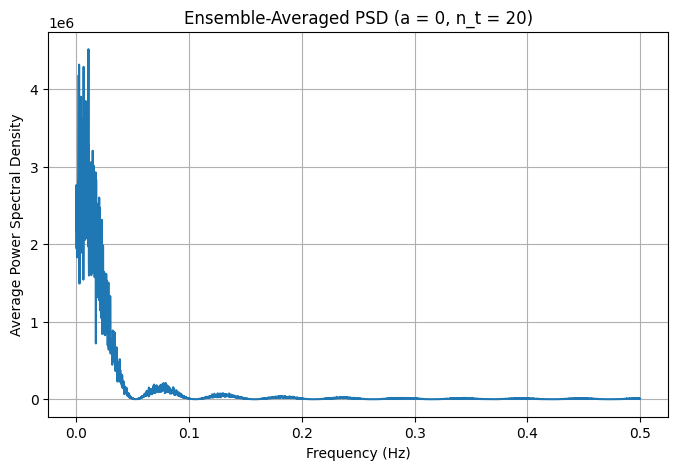

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 2**13            # Number of FFT points
Delta_t = 1          # Sampling interval
Delta_f = 1 / (N * Delta_t)  # Frequency resolution
frequencies = np.arange(N) * Delta_f  # Frequency array
n_t = 20             # Number of realizations
a = 0              # Filter parameter (can set a = 0 for moving average)

# Function to generate Gaussian i.i.d. samples and compute PSD
def compute_psd(N, a):
    # Generate Gaussian i.i.d. samples
    X_k = np.random.normal(0, 1, N)
    
    # Define filter impulse response h(t)
    def h(t, a):
        return np.exp(-a * t) * (t >= 0) * (t < 20)
    
    # Compute Y(t)
    Y = np.zeros(N)
    for i in range(N):
        for k in range(min(i, len(X_k))):
            Y[i] += X_k[k] * h(i - k, a) * Delta_t
    
    # Perform FFT
    Y_fft = np.fft.fft(Y)
    PSD = np.abs(Y_fft) ** 2  # Power Spectral Density
    return PSD

# Initialize an array to store the average PSD
avg_psd = np.zeros(N)

# Compute PSD for n_t realizations and average
for _ in range(n_t):
    avg_psd += compute_psd(N, a)

avg_psd /= n_t

# Plot the average PSD
plt.figure(figsize=(8, 5))
plt.plot(frequencies[:N // 2], avg_psd[:N // 2])  # Plot only positive frequencies
plt.xlabel('Frequency (Hz)')
plt.ylabel('Average Power Spectral Density')
plt.title(f'Ensemble-Averaged PSD (a = {a}, n_t = {n_t})')
plt.grid()
plt.show()


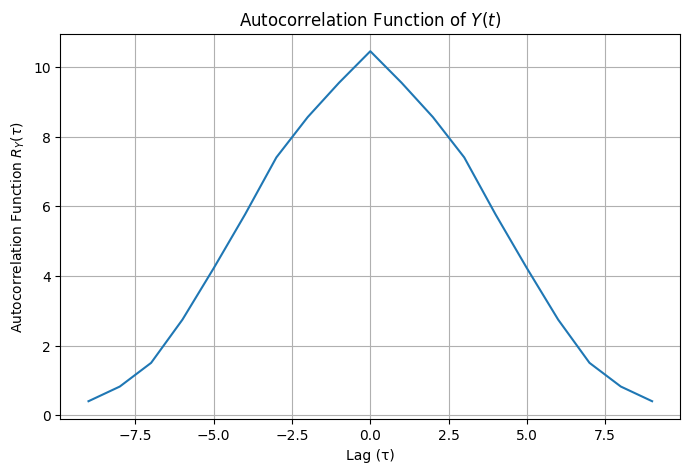

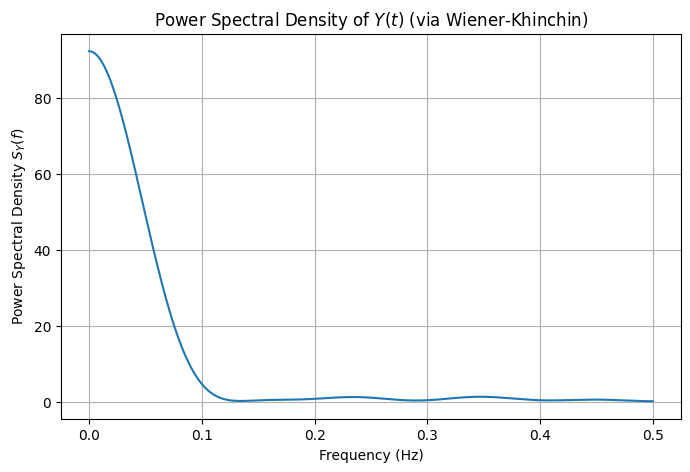

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate

# Parameters
T = 1                    # Sampling period
alpha = 0.2              # Filter parameter
num_samples = 10#0000     # Number of time samples
Delta_t = T              # Sampling interval
time = np.arange(0, num_samples) * Delta_t  # Time vector

# Define filter impulse response h(t)
def h(t, a):
    return np.exp(-a * t) * (t >= 0)

# Generate Gaussian i.i.d. samples
np.random.seed(0)  # For reproducibility
X_k = np.random.normal(0, 1, num_samples)

# Compute Y(t) using the filter
Y = np.zeros_like(time, dtype=float)
for i, t in enumerate(time):
    for k in range(min(i + 1, len(X_k))):
        Y[i] += X_k[k] * h(t - k * Delta_t, alpha) * Delta_t

# Compute the autocorrelation function R_Y(tau)
R_Y = correlate(Y, Y, mode='full') / num_samples
lags = np.arange(-num_samples + 1, num_samples)

# Use Wiener-Khinchin theorem: Compute PSD using FFT of R_Y
fft_len = 2**14  # FFT length (to control resolution)
S_Y = np.abs(np.fft.fft(R_Y, fft_len))
frequencies = np.fft.fftfreq(fft_len, d=Delta_t)

# Plot autocorrelation function
plt.figure(figsize=(8, 5))
plt.plot(lags * Delta_t, R_Y)
plt.xlabel('Lag (τ)')
plt.ylabel('Autocorrelation Function $R_Y(\\tau)$')
plt.title('Autocorrelation Function of $Y(t)$')
plt.grid()
plt.show()

# Plot Power Spectral Density
plt.figure(figsize=(8, 5))
plt.plot(frequencies[:fft_len // 2], S_Y[:fft_len // 2])  # Only positive frequencies
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density $S_Y(f)$')
plt.title('Power Spectral Density of $Y(t)$ (via Wiener-Khinchin)')
plt.grid()
plt.show()
